In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import files
_ = files.upload()

Saving datos-metereologia.txt to datos-metereologia (1).txt


In [ ]:
df = pd.read_csv("datos-metereologia.txt", delim_whitespace=True)
df.head(25)

/tmp/ipython-input-3231125819.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("datos-metereologia.txt", delim_whitespace=True)


,Año,Mes,Dia,P.diaria,Tmax,Tmin
0,1963,1,1,0.0,21.0,6.00
1,1963,1,2,0.0,21.0,6.00
2,1963,1,3,0.0,21.0,8.00
3,1963,1,4,0.0,21.5,6.00
4,1963,1,5,0.0,21.5,6.50
5,1963,1,6,0.0,21.5,8.20
6,1963,1,7,0.0,21.8,7.50
7,1963,1,8,0.7,18.0,7.80
8,1963,1,9,0.9,17.5,7.50
9,1963,1,10,0.2,17.5,7.50


In [ ]:
enero_1963 = df.loc[(df['Año'] == 1963) & (df['Mes'] == 1), 'Tmax']
enero_2014 = df.loc[(df['Año'] == 2014) & (df['Mes'] == 1), 'Tmax']

In [ ]:
print(enero_1963.head())
print(enero_2014.head())

0    21.0
1    21.0
2    21.0
3    21.5
4    21.5
Name: Tmax, dtype: float64
18628    18.0
18629    18.3
18630    19.0
18631    17.8
18632    18.5
Name: Tmax, dtype: float64


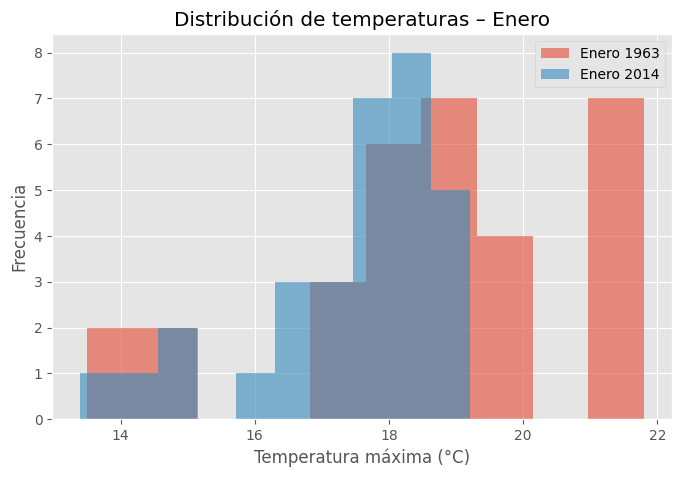

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(enero_1963, bins=10, alpha=0.6, label='Enero 1963')
plt.hist(enero_2014, bins=10, alpha=0.6, label='Enero 2014')

plt.xlabel('Temperatura máxima (°C)')
plt.ylabel('Frecuencia')
plt.title('Distribución de temperaturas – Enero')
plt.legend()
plt.show()

El histograma muestra que las temperaturas máximas en enero de 2014 presentan un desplazamiento hacia valores mayores en comparación con enero de 1963. Además, la distribución de 2014 evidencia una mayor dispersión, lo que indica un aumento en la variabilidad térmica. Estos resultados sugieren un incremento tanto en la temperatura promedio como en la variabilidad climática a lo largo del tiempo.

In [ ]:
febrero_2013 = df.loc[(df['Año'] == 2013) & (df['Mes'] == 2), 'Tmax']
enero_2014 = df.loc[(df['Año'] == 2014) & (df['Mes'] == 1), 'Tmax']

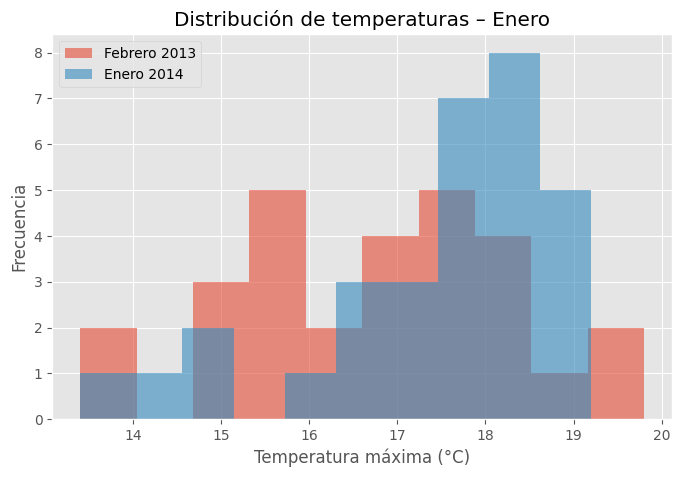

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(febrero_2013, bins=10, alpha=0.6, label='Febrero 2013')
plt.hist(enero_2014, bins=10, alpha=0.6, label='Enero 2014')

plt.xlabel('Temperatura máxima (°C)')
plt.ylabel('Frecuencia')
plt.title('Distribución de temperaturas – Enero')
plt.legend()
plt.show()

/tmp/ipython-input-3734813831.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([enero_1963, enero_2014], labels=['1963', '2014'])


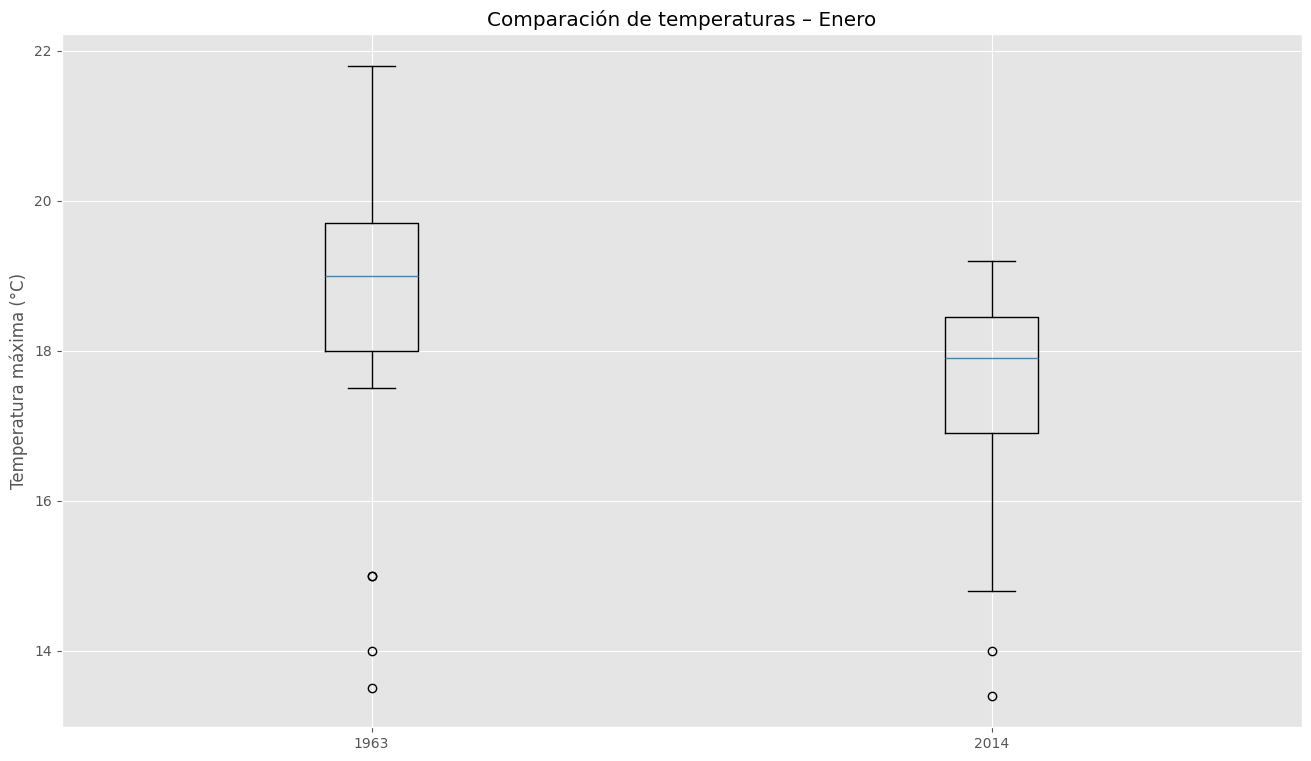

In [ ]:
plt.boxplot([enero_1963, enero_2014], labels=['1963', '2014'])
plt.ylabel('Temperatura máxima (°C)')
plt.title('Comparación de temperaturas – Enero')
plt.show()

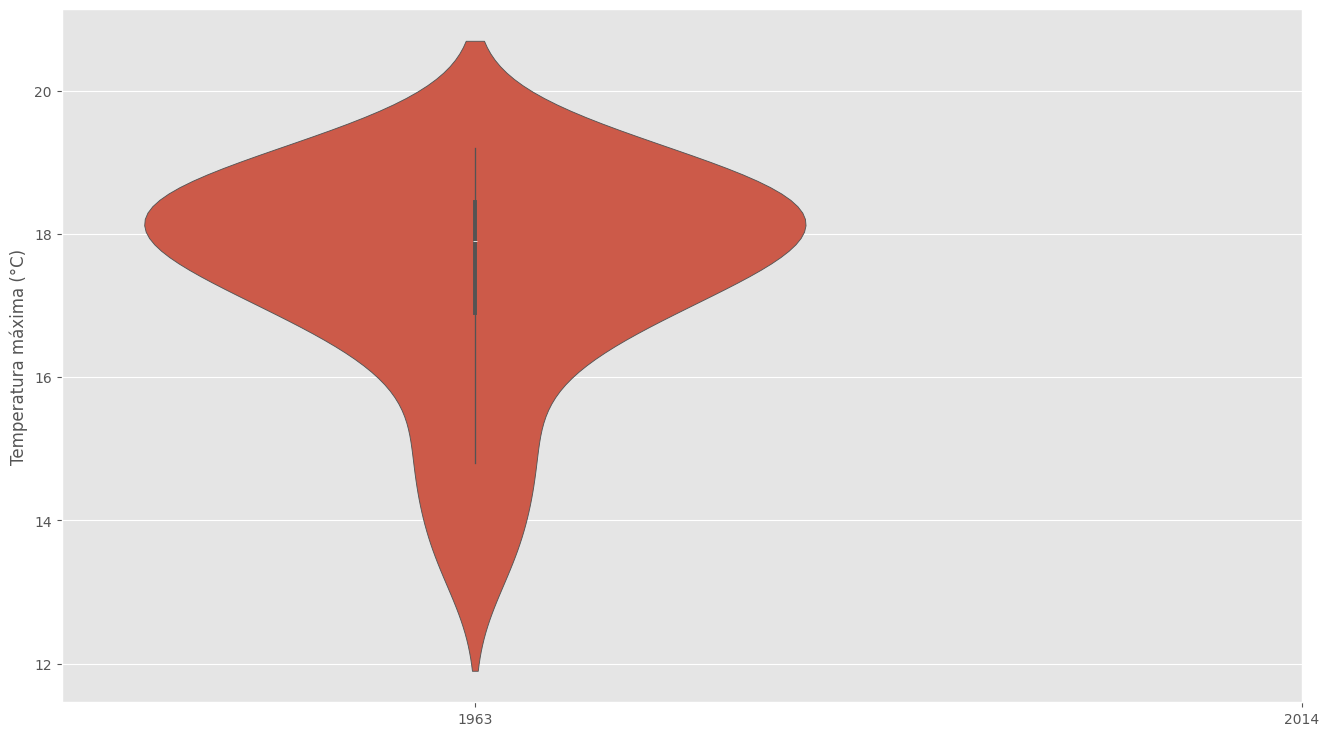

In [ ]:
sb.violinplot(data=[enero_1963, enero_2014])
plt.xticks([0,1], ['1963','2014'])
plt.ylabel('Temperatura máxima (°C)')
plt.show()

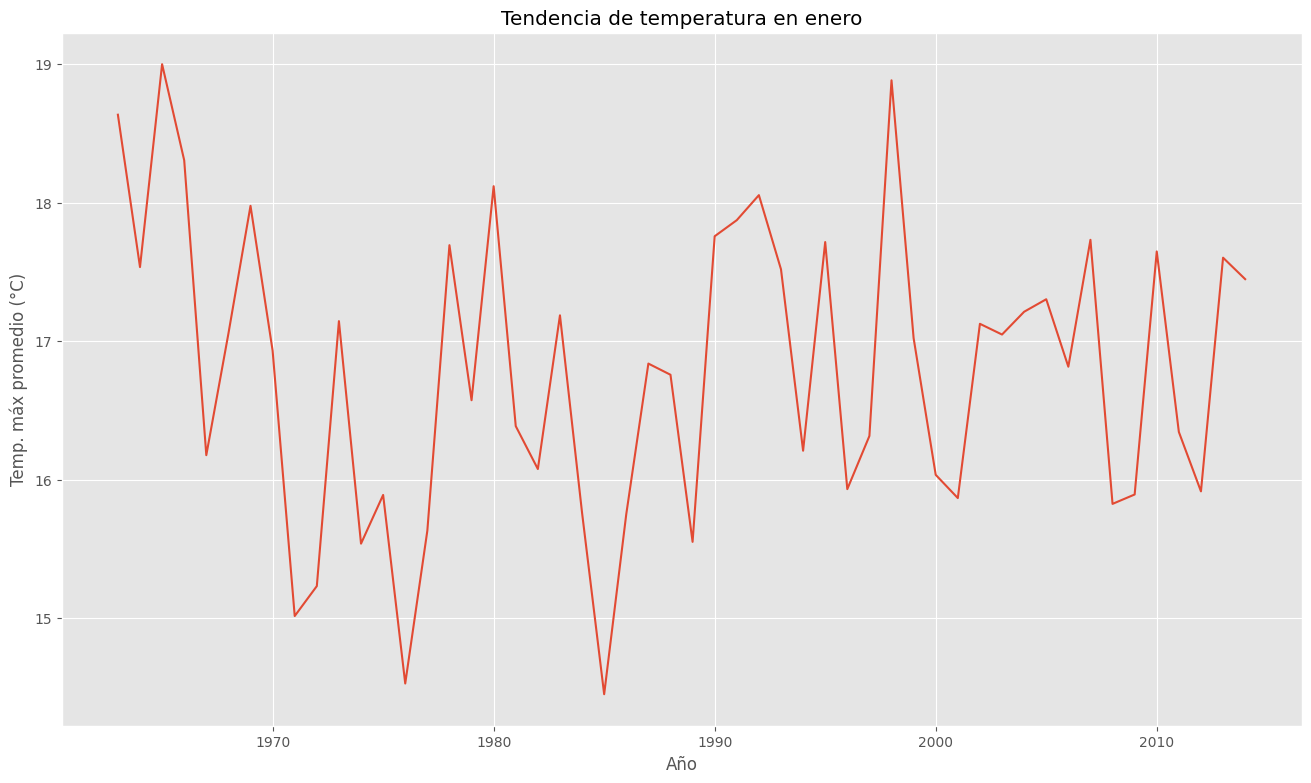

In [ ]:
enero = df[df['Mes'] == 1].groupby('Año')['Tmax'].mean()

plt.plot(enero)
plt.xlabel('Año')
plt.ylabel('Temp. máx promedio (°C)')
plt.title('Tendencia de temperatura en enero')
plt.show()